In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

# 문자열 -> 시간

In [10]:
## 문자열-> datetime 형식
print("문자열 2022-11-30 :",pd.to_datetime('2022-11-30'))

## 년 월 문자열
print("문자열 2022-11-30 :",pd.to_datetime('2022-11'))

# 년도 문자열
print("문자열 2022-11-30 :",pd.to_datetime('2022'))

문자열 2022-11-30 : 2022-11-30 00:00:00
문자열 2022-11-30 : 2022-11-01 00:00:00
문자열 2022-11-30 : 2022-01-01 00:00:00


In [7]:
## 문자열-> datetime 형식
print(datetime.strptime('2022-11-30','%Y-%m-%d'))

## 년 월 문자열
print(datetime.strptime('2022-11','%Y-%m'))

# 년도 문자열
print(datetime.strptime('2022','%Y'))

2022-11-30 00:00:00
2022-11-01 00:00:00
2022-01-01 00:00:00


In [13]:
datetime.strptime('2022-11-30','%Y-%m-%d')

datetime.datetime(2022, 11, 30, 0, 0)

In [14]:
datetime.strptime('2022-11','%Y-%m')

datetime.datetime(2022, 11, 1, 0, 0)

In [5]:
datetime.strptime('2022','%Y')

datetime.datetime(2022, 1, 1, 0, 0)

# 날짜 -> 문자열

In [17]:
now = datetime.now()
print('현재시간: ',now)

# datetime.strftime 사용
print('datetime사용 :', datetime.strftime(now,'%Y-%m-%d'))

# 문자열 형식 바꿀 수 있음
print('datetime사용 :', datetime.strftime(now,'%Y/%m/%d'))

# str 사용
print('str사용: ', str(now))

# str사용 년월일만
print('str사용: ', str(now)[:10])


현재시간:  2023-01-02 21:37:26.746364
datetime사용 : 2023-01-02
datetime사용 : 2023/01/02
str사용:  2023-01-02 21:37:26.746364
str사용:  2023-01-02


In [18]:
datetime.strftime(now,'%Y-%m-%d')

'2022-11-30'

In [19]:
str(now)

'2022-11-30 19:45:08.059053'

In [21]:
str(now)[:10]

'2022-11-30'

# 시간 차이 구하기

In [28]:
df = pd.read_csv('./data/pollution.csv',parse_dates=['date'],index_col='date')
df.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [34]:
df.index[-1]

Timestamp('2014-12-31 23:00:00')

## train valid test split

In [22]:
# 1시간
print(pd.Timedelta(hours=1))

# 1일
print(pd.Timedelta(days=1))

# 1주
print(pd.Timedelta(weeks=1))

0 days 01:00:00
1 days 00:00:00
7 days 00:00:00


In [19]:
print(pd.Timedelta(days=1))

1 days 00:00:00


In [20]:
print(pd.Timedelta(weeks=1))

7 days 00:00:00


In [21]:
print(pd.Timedelta(months=1))

ValueError: cannot construct a Timedelta from the passed arguments, allowed keywords are [weeks, days, hours, minutes, seconds, milliseconds, microseconds, nanoseconds]

## pd.offset

In [29]:
pd.offsets.Day()

<2 * Days>

## dateutil

In [34]:
from dateutil.relativedelta import relativedelta

now = datetime.now()
print("현재시간 :", now)

# 한달 뒤
print("한달 뒤: ", now + relativedelta(months=1))

현재시간 : 2023-01-02 21:56:17.210553
한달 뒤:  2023-02-02 21:56:17.210553


In [53]:
df = df['pollution'].to_frame()
test_range = relativedelta(months=6)

train_start = '2010-01'
train_end = '2013-12'

valid_start_dt = pd.to_datetime(train_end) + relativedelta(months=1)
valid_start = str(valid_start_dt)[:7]

valid_end_dt = valid_start_dt + test_range
valid_end = str(valid_end_dt)[:7]
print(f'valid_start: {valid_start}, valid_end={valid_end}')

test_start_dt = valid_end_dt + relativedelta(months=1)
test_start = str(test_start_dt)[:7]

test_end_dt = test_start_dt + test_range
test_end = str(test_end_dt)[:7]
print(f'test_start: {test_start}, valid_end={test_end}')

valid_start: 2014-01, valid_end=2014-07
test_start: 2014-08, valid_end=2015-02


In [54]:
df_train = df.loc[:train_end]
df_valid = df.loc[valid_start:valid_end]
df_test = df.loc[test_start:test_end]

Text(0.5, 0, 'date')

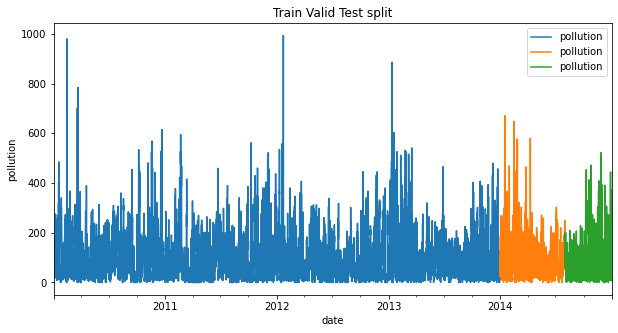

In [55]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,5))
df_train.plot(ax=ax, label='train')
df_valid.plot(ax=ax, label='valid')
df_test.plot(ax=ax, label='test')
ax.set_title('Train Valid Test split')
ax.set_ylabel('pollution')
ax.set_xlabel('date')